# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE



In [ ]:
# Load dataset
df = pd.read_csv('city_day.csv')

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f31ecca868c05f98608fa3a86b6610669ad8fef4d3d61f6841ee9f3b5ef0959d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# **Visualize the Dataset**

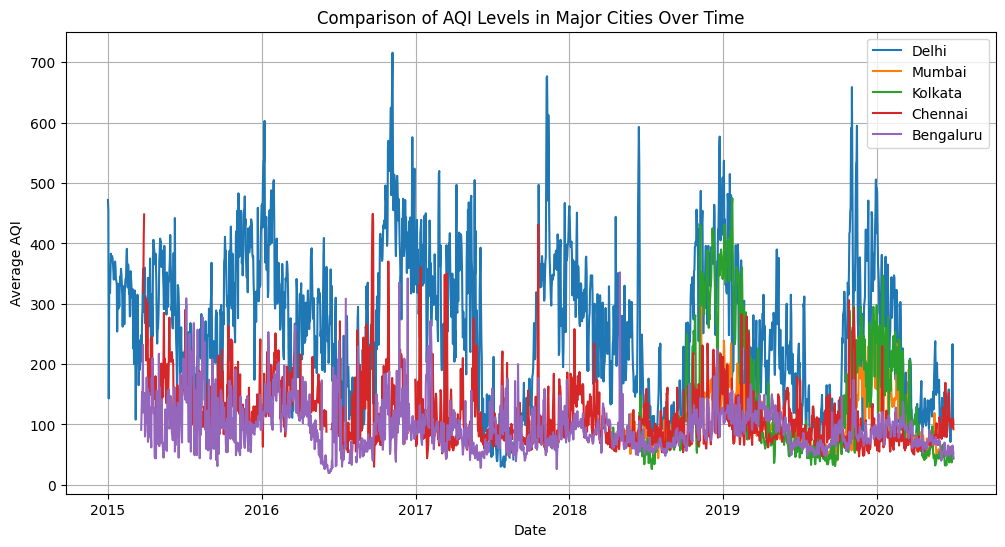

In [ ]:

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Select a few major cities for comparison
selected_cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru"]
df_filtered = df[df["City"].isin(selected_cities)]

# Group by Date and City, taking the mean AQI values
df_grouped = df_filtered.groupby(["Date", "City"])["AQI"].mean().unstack()

# Plot the AQI trends
plt.figure(figsize=(12, 6))
for city in selected_cities:
    plt.plot(df_grouped.index, df_grouped[city], label=city)

plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.title("Comparison of AQI Levels in Major Cities Over Time")
plt.legend()
plt.grid(True)
plt.show()


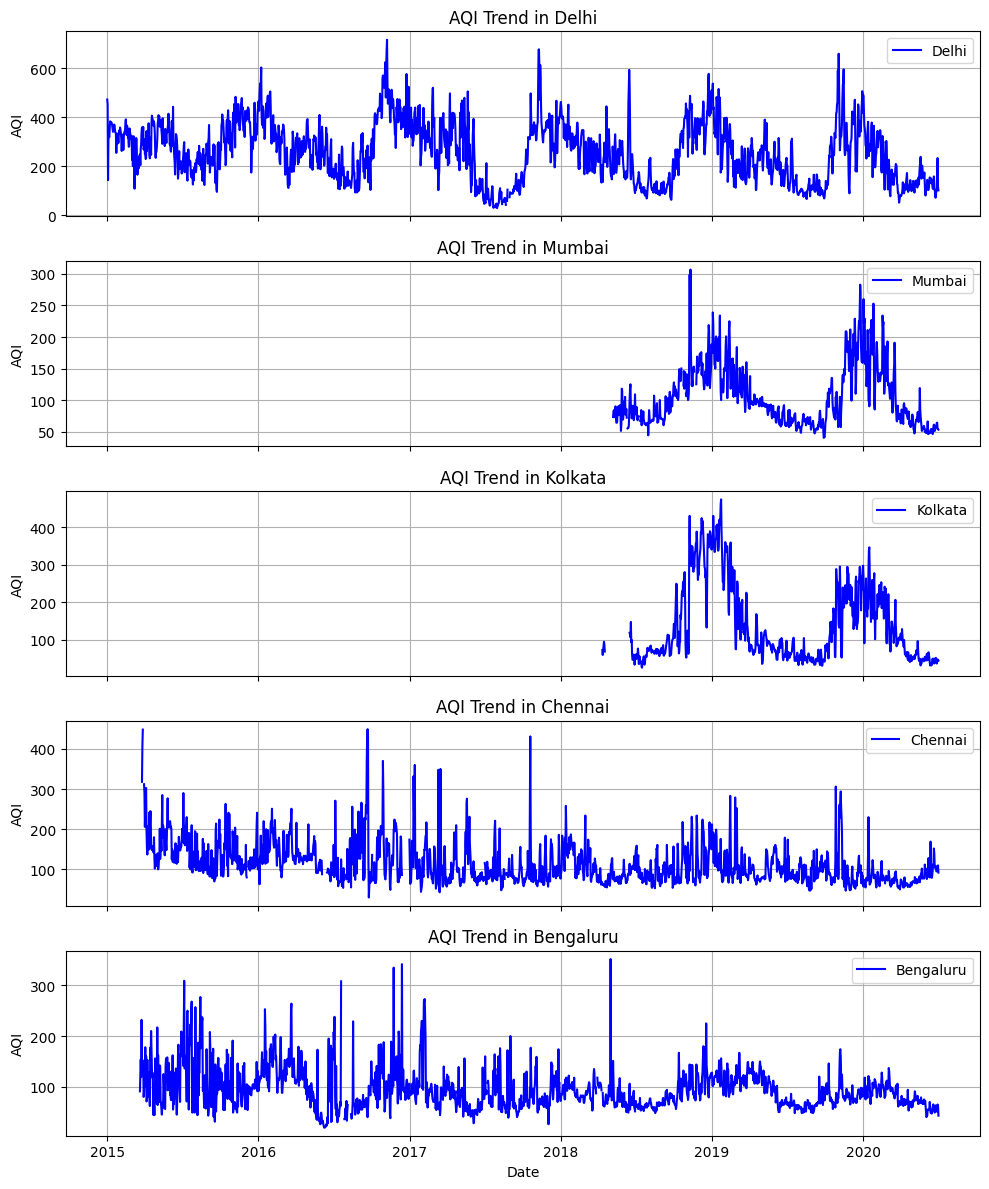

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

# Select a few major cities for comparison
selected_cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru"]
df_filtered = df[df["City"].isin(selected_cities)]

# Group by Date and City, taking the mean AQI values
df_grouped = df_filtered.groupby(["Date", "City"])["AQI"].mean().unstack()

# Create subplots
fig, axes = plt.subplots(len(selected_cities), 1, figsize=(10, 12), sharex=True)

for i, city in enumerate(selected_cities):
    axes[i].plot(df_grouped.index, df_grouped[city], label=city, color="b")
    axes[i].set_title(f"AQI Trend in {city}")
    axes[i].set_ylabel("AQI")
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [ ]:
# prompt: size of df

df.shape


(29531, 16)

In [ ]:
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Drop unnecessary columns
df.drop(['Benzene', 'Toluene', 'Xylene', 'NH3', 'Date'], axis=1, inplace=True)

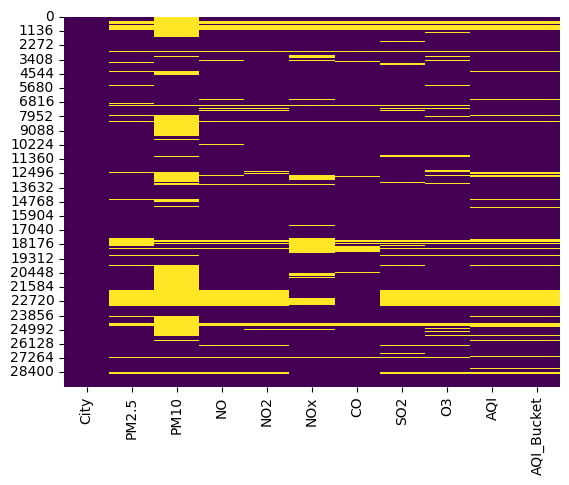

In [ ]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# **Handle Missing Values**

In [ ]:
# Handle missing values
for col in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI']:
    df[col].fillna(df[col].mean(), inplace=True)

df['City'].fillna(df['City'].mode()[0], inplace=True)
df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0], inplace=True)

<ipython-input-10-2cd7f97c9f01>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-10-2cd7f97c9f01>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

# **Encoding and Removing Outlier**

<ipython-input-11-6b658c3ce92d>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-11-6b658c3ce92d>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

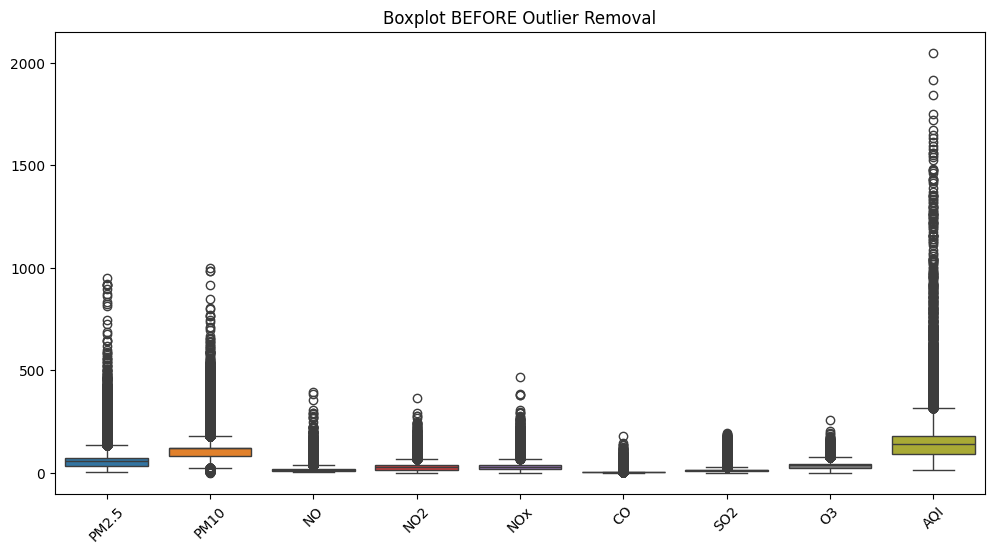

Original dataset size: 29531
Target dataset size (80%): 23625
Threshold: 1.50, Remaining data size: 19199 (65.01%)
Threshold: 1.60, Remaining data size: 19751 (66.88%)
Threshold: 1.70, Remaining data size: 20226 (68.49%)
Threshold: 1.80, Remaining data size: 20632 (69.87%)
Threshold: 1.90, Remaining data size: 20983 (71.05%)
Threshold: 2.00, Remaining data size: 21301 (72.13%)
Threshold: 2.10, Remaining data size: 21611 (73.18%)
Threshold: 2.20, Remaining data size: 21847 (73.98%)
Threshold: 2.30, Remaining data size: 22083 (74.78%)
Threshold: 2.40, Remaining data size: 22302 (75.52%)
Threshold: 2.50, Remaining data size: 22533 (76.30%)
Threshold: 2.60, Remaining data size: 22732 (76.98%)
Threshold: 2.70, Remaining data size: 22913 (77.59%)
Threshold: 2.80, Remaining data size: 23107 (78.25%)
Threshold: 2.90, Remaining data size: 23296 (78.89%)
Threshold: 3.00, Remaining data size: 23480 (79.51%)
Threshold: 3.10, Remaining data size: 23675 (80.17%)
Outliers removed successfully with th

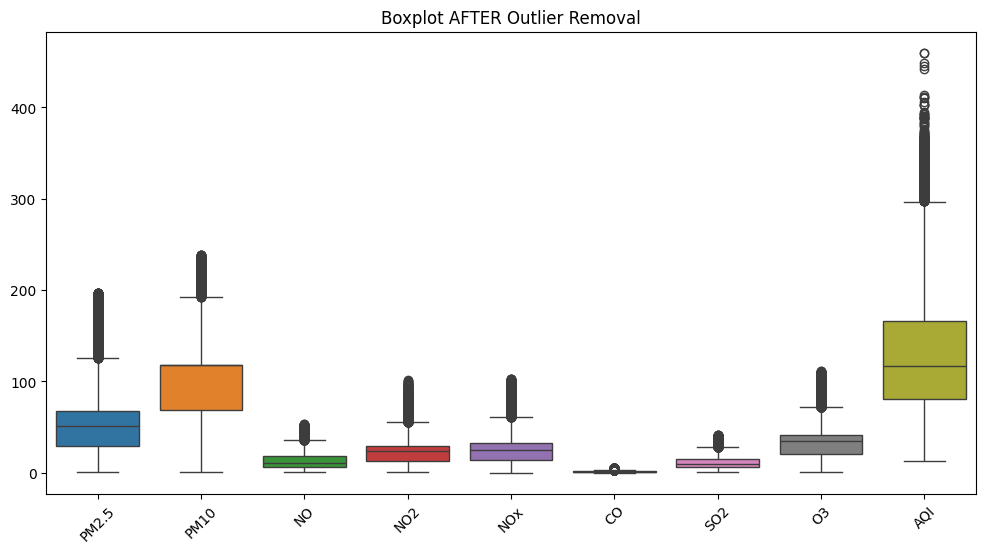

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv('city_day.csv')  # Ensure this file is in your working directory

# Drop unnecessary columns
df.drop(['Benzene', 'Toluene', 'Xylene', 'NH3', 'Date'], axis=1, inplace=True)

# Handle missing values
for col in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI']:
    df[col].fillna(df[col].mean(), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0], inplace=True)

# Encoding AQI_Bucket
oe = OrdinalEncoder(categories=[['Moderate', 'Satisfactory', 'Poor', 'Very Poor', 'Good', 'Severe']])
df['AQI_Bucket_Encoded'] = oe.fit_transform(df[['AQI_Bucket']])
df.drop('AQI_Bucket', axis=1, inplace=True)

# One-hot encoding for 'City'
ohe = OneHotEncoder(sparse_output=False)
city_encoded = ohe.fit_transform(df[['City']])
city_encoded_df = pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out(['City']))
df = pd.concat([df, city_encoded_df], axis=1)
df.drop('City', axis=1, inplace=True)

# Define numerical columns
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI']
available_cols = [col for col in numerical_cols if col in df.columns]

# Visualize data BEFORE outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[available_cols])
plt.title("Boxplot BEFORE Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Outlier Detection with Adjusted Threshold
Q1 = df[available_cols].quantile(0.25)
Q3 = df[available_cols].quantile(0.75)
IQR = Q3 - Q1
original_size = df.shape[0]
target_size = original_size * 0.80  # Target 80% of original size

print(f"Original dataset size: {original_size}")
print(f"Target dataset size (80%): {target_size:.0f}")

threshold = 1.5  # Start with a baseline
step = 0.1  # Increment to fine-tune
max_threshold = 5.0  # Upper limit to avoid infinite loop

while threshold <= max_threshold:
    filtered_df = df[~((df[available_cols] < (Q1 - threshold * IQR)) |
                       (df[available_cols] > (Q3 + threshold * IQR))).any(axis=1)]
    remaining_size = filtered_df.shape[0]
    percentage = remaining_size / original_size * 100
    print(f"Threshold: {threshold:.2f}, Remaining data size: {remaining_size} ({percentage:.2f}%)")

    if remaining_size >= target_size:  # Stop when we retain at least 80%
        df = filtered_df
        print(f"Outliers removed successfully with threshold {threshold:.2f}")
        break
    threshold += step  # Increase threshold to retain more data

# Check final size
if df.shape[0] == 0:
    print("Warning: No data left after outlier removal. Consider adjusting logic.")
elif df.shape[0] < target_size:
    print(f"Note: Could not retain 80%. Final size: {df.shape[0]} ({df.shape[0]/original_size*100:.2f}%)")
else:
    print(f"Dataset size after outlier removal: {df.shape[0]} ({df.shape[0]/original_size*100:.2f}%)")

# Visualize data AFTER outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[available_cols])
plt.title("Boxplot AFTER Outlier Removal")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Splitting Features and Target
X = df.drop('AQI_Bucket_Encoded', axis=1)
y = df['AQI_Bucket_Encoded']

In [ ]:
# Ensure there are enough samples before train-test split
if X.shape[0] < 2:
    raise ValueError("Not enough samples to perform train-test split.")

# Compute correlation matrix and drop highly correlated features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
X.drop(columns=to_drop, inplace=True)

# Train-test split with a check to avoid empty train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError("Train-test split resulted in an empty dataset. Adjust test_size or check data preprocessing.")


In [ ]:
# SMOTE for balancing classes
if len(np.unique(y_train)) > 1:
    smote = SMOTE(random_state=42)
    X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
else:
    X_resampled_smote, y_resampled_smote = X_train, y_train

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled_smote)
X_test_scaled = scaler.transform(X_test)

# **Random Forest**

In [ ]:
# Regularized Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    n_jobs=-1
)
rf.fit(X_train_scaled, y_resampled_smote)
y_pred_rf = rf.predict(X_test_scaled)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')

Random Forest Accuracy: 0.7734


# **SVM**

In [ ]:
# Regularized SVM Classifier with probability enabled
svm = SVC(kernel='rbf', gamma='scale', C=1, random_state=42, probability=True)  # Add probability=True
svm.fit(X_train_scaled, y_resampled_smote)

y_pred_svm = svm.predict(X_test_scaled)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}')


SVM Accuracy: 0.7897


# **Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Regularized Logistic Regression
lr = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs')
lr.fit(X_train_scaled, y_resampled_smote)
y_pred_lr = lr.predict(X_test_scaled)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')

Logistic Regression Accuracy: 0.7001


# **KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_resampled_smote)
y_pred_knn = knn.predict(X_test_scaled)
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')

KNN Accuracy: 0.7700


# **XGBoost**

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_resampled_smote)), random_state=42)
xgb_model.fit(X_train_scaled, y_resampled_smote)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')


XGBoost Accuracy: 0.8146


# **Decision Tree Gini**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_scaled, y_resampled_smote)

y_pred_dt_gini = dt_gini.predict(X_test_scaled)

print(f'Decision Tree (Gini) Accuracy: {accuracy_score(y_test, y_pred_dt_gini):.4f}')


Decision Tree (Gini) Accuracy: 0.7618


# **Decision Tree Entropy**

In [ ]:
# prompt: give for C4.5

from sklearn.tree import DecisionTreeClassifier


dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_scaled, y_resampled_smote)
y_pred_dt_entropy = dt_entropy.predict(X_test_scaled)
print(f'Decision Tree (Entropy) Accuracy: {accuracy_score(y_test, y_pred_dt_entropy):.4f}')


Decision Tree (Entropy) Accuracy: 0.7649


# **Bar Graph Comparison**

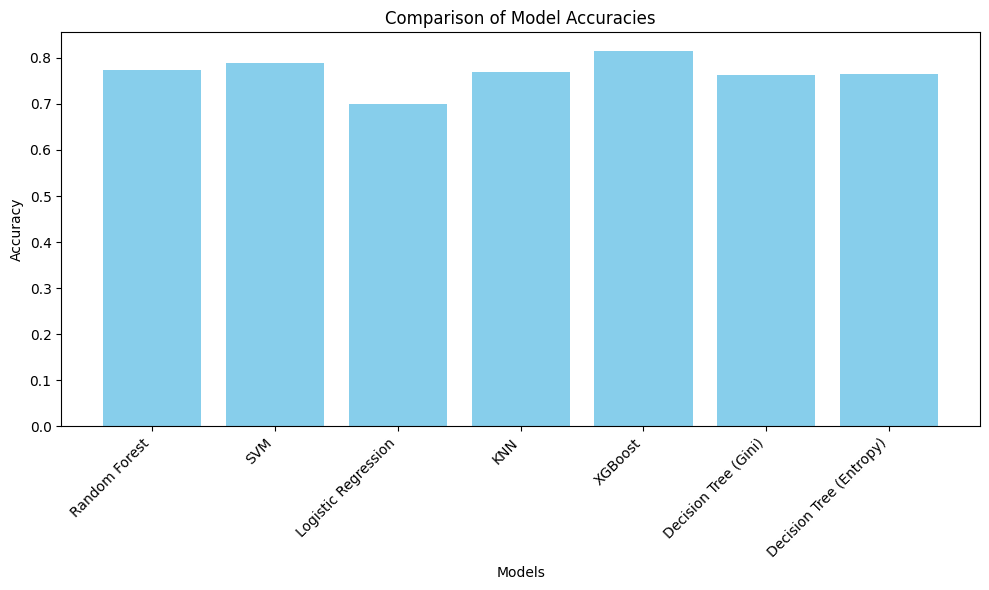

In [ ]:
# prompt: USE BAR GRAPH TO COMPARE THE MODELS

import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual scores)
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'Decision Tree (Gini)', 'Decision Tree (Entropy)']
accuracy_scores = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm),
                   accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn),
                   accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_dt_gini), accuracy_score(y_test, y_pred_dt_entropy)]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      2426
         1.0       0.77      0.82      0.79      1592
         2.0       0.50      0.71      0.59       312
         3.0       0.73      0.75      0.74       145
         4.0       0.56      0.79      0.66       258
         5.0       0.00      0.00      0.00         2

    accuracy                           0.77      4735
   macro avg       0.58      0.64      0.60      4735
weighted avg       0.80      0.77      0.78      4735



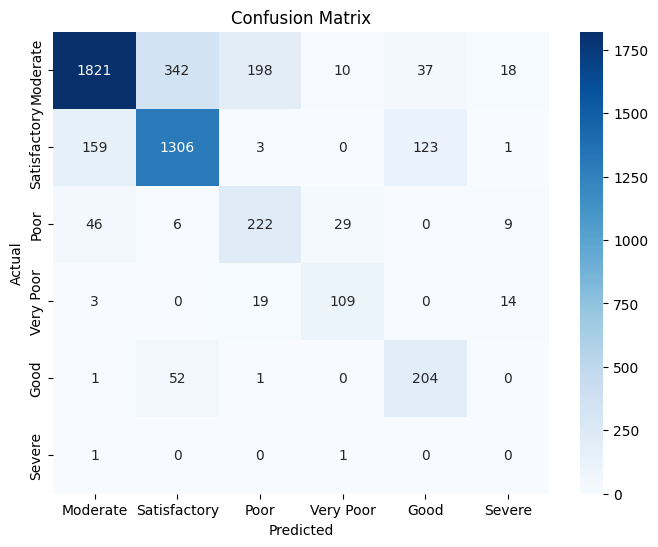

In [ ]:
# prompt: give evaluation matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred_rf are defined (replace with your actual predictions)

# Classification Report
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=oe.categories_[0], yticklabels=oe.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Federated Learning**

In [ ]:
!pip install tensorflow-federated


# **SVM K fold**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, shuffle data

svm_accuracy_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_resampled_smote[train_index], y_resampled_smote[val_index]

    svm = SVC(kernel='rbf', gamma='scale', C=1, random_state=42) # Use the best parameters you found
    svm.fit(X_train_fold, y_train_fold)

    y_pred_svm = svm.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred_svm)
    svm_accuracy_scores.append(accuracy)

print("SVM Accuracy scores for each fold:", svm_accuracy_scores)

average_accuracy = np.mean(svm_accuracy_scores)
print(f"Average SVM Accuracy across all folds: {average_accuracy:.4f}")

SVM Accuracy scores for each fold: [0.8533030805480408, 0.8588009424906188, 0.8599354219390872, 0.8556593070948599, 0.8513702216791761]
Average SVM Accuracy across all folds: 0.8558


# **XG Boost K Fold**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Verify target variable encoding (for debugging)
print("Unique values in y_resampled_smote:", np.unique(y_resampled_smote))
print("Data type of y_resampled_smote:", y_resampled_smote.dtype)

# Define K-Fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define XGBoost classifier (removed use_label_encoder)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted', zero_division=1),
    'f1': make_scorer(f1_score, average='weighted', zero_division=1)
}

# Perform cross-validation
cv_results = cross_val_score(xgb, X_train_scaled, y_resampled_smote, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(xgb, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['precision'])
recall_scores = cross_val_score(xgb, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['recall'])
f1_scores = cross_val_score(xgb, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['f1'])

# Print cross-validation results
print(f'XGBoost Cross-Validation Accuracies: {cv_results}')
print(f'Mean Accuracy: {cv_results.mean():.4f}')
print(f'Mean Precision: {precision_scores.mean():.4f}')
print(f'Mean Recall: {recall_scores.mean():.4f}')
print(f'Mean F1 Score: {f1_scores.mean():.4f}')
print(f'Standard Deviation of Accuracy: {cv_results.std():.4f}')

Unique values in y_resampled_smote: [0. 1. 2. 3. 4. 5.]
Data type of y_resampled_smote: float64
XGBoost Cross-Validation Accuracies: [0.9287896  0.9320185  0.93402566 0.9287896  0.92834701]
Mean Accuracy: 0.9304
Mean Precision: 0.9299
Mean Recall: 0.9304
Mean F1 Score: 0.9299
Standard Deviation of Accuracy: 0.0022


# **MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                    max_iter=500, random_state=42)

# Train the MLP model
mlp.fit(X_train_scaled, y_resampled_smote)

# Predict on test data
y_pred_mlp = mlp.predict(X_test_scaled)

# Print evaluation metrics
print(f'MLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}')
print(f'MLP Precision: {precision_score(y_test, y_pred_mlp, average="weighted", zero_division=1):.4f}')
print(f'MLP Recall: {recall_score(y_test, y_pred_mlp, average="weighted", zero_division=1):.4f}')
print(f'MLP F1 Score: {f1_score(y_test, y_pred_mlp, average="weighted", zero_division=1):.4f}')
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.8156
MLP Precision: 0.8243
MLP Recall: 0.8156
MLP F1 Score: 0.8185

Confusion Matrix:
 [[2010  257  122   13   23    1]
 [ 148 1352    3    1   88    0]
 [  70    4  209   28    1    0]
 [   2    1   39  102    0    1]
 [   3   65    1    0  189    0]
 [   1    0    0    1    0    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      2426
         1.0       0.81      0.85      0.83      1592
         2.0       0.56      0.67      0.61       312
         3.0       0.70      0.70      0.70       145
         4.0       0.63      0.73      0.68       258
         5.0       0.00      0.00      0.00         2

    accuracy                           0.82      4735
   macro avg       0.60      0.63      0.61      4735
weighted avg       0.82      0.82      0.82      4735



# **ADA Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define K-Fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted', zero_division=1),
    'f1': make_scorer(f1_score, average='weighted', zero_division=1)
}

# Perform cross-validation
cv_results = cross_val_score(adaboost, X_train_scaled, y_resampled_smote, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(adaboost, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['precision'])
recall_scores = cross_val_score(adaboost, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['recall'])
f1_scores = cross_val_score(adaboost, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['f1'])

# Print cross-validation results
print(f'AdaBoost Cross-Validation Accuracies: {cv_results}')
print(f'Mean Accuracy: {cv_results.mean():.4f}')
print(f'Mean Precision: {precision_scores.mean():.4f}')
print(f'Mean Recall: {recall_scores.mean():.4f}')
print(f'Mean F1 Score: {f1_scores.mean():.4f}')
print(f'Standard Deviation of Accuracy: {cv_results.std():.4f}')

AdaBoost Cross-Validation Accuracies: [0.60493935 0.67562615 0.64412252 0.66436862 0.66172107]
Mean Accuracy: 0.6502
Mean Precision: 0.6694
Mean Recall: 0.6502
Mean F1 Score: 0.6474
Standard Deviation of Accuracy: 0.0248


# **Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Replace 'base_estimator' with 'estimator'
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42, n_jobs=-1)

# Train the Bagging model
bagging.fit(X_train_scaled, y_resampled_smote)

# Predict on test data
y_pred_bagging = bagging.predict(X_test_scaled)

# Print evaluation metrics
print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}')
print(f'Bagging Precision: {precision_score(y_test, y_pred_bagging, average="weighted", zero_division=1):.4f}')
print(f'Bagging Recall: {recall_score(y_test, y_pred_bagging, average="weighted", zero_division=1):.4f}')
print(f'Bagging F1 Score: {f1_score(y_test, y_pred_bagging, average="weighted", zero_division=1):.4f}')
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))

Bagging Accuracy: 0.8129
Bagging Precision: 0.8189
Bagging Recall: 0.8129
Bagging F1 Score: 0.8152

Confusion Matrix:
 [[2034  246  112   14   19    1]
 [ 174 1325    6    0   87    0]
 [  71    5  193   43    0    0]
 [   4    0   34  105    0    2]
 [   8   58    0    0  192    0]
 [   2    0    0    0    0    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      2426
         1.0       0.81      0.83      0.82      1592
         2.0       0.56      0.62      0.59       312
         3.0       0.65      0.72      0.68       145
         4.0       0.64      0.74      0.69       258
         5.0       0.00      0.00      0.00         2

    accuracy                           0.81      4735
   macro avg       0.59      0.63      0.61      4735
weighted avg       0.82      0.81      0.82      4735



# **Logistic Regression K Fold**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define K-Fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define Logistic Regression classifier
lr = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs', random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted', zero_division=1),
    'f1': make_scorer(f1_score, average='weighted', zero_division=1)
}

# Perform cross-validation
cv_results = cross_val_score(lr, X_train_scaled, y_resampled_smote, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(lr, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['precision'])
recall_scores = cross_val_score(lr, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['recall'])
f1_scores = cross_val_score(lr, X_train_scaled, y_resampled_smote, cv=kf, scoring=scoring['f1'])

# Print cross-validation results
print(f'Logistic Regression Cross-Validation Accuracies: {cv_results}')
print(f'Mean Accuracy: {cv_results.mean():.4f}')
print(f'Mean Precision: {precision_scores.mean():.4f}')
print(f'Mean Recall: {recall_scores.mean():.4f}')
print(f'Mean F1 Score: {f1_scores.mean():.4f}')
print(f'Standard Deviation of Accuracy: {cv_results.std():.4f}')

Logistic Regression Cross-Validation Accuracies: [0.72737586 0.73435727 0.73025569 0.73435727 0.7226392 ]
Mean Accuracy: 0.7298
Mean Precision: 0.7302
Mean Recall: 0.7298
Mean F1 Score: 0.7284
Standard Deviation of Accuracy: 0.0044
